# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

## 1. 13520118 - Mohamad Daffa Argakoesoemah
## 2. 13520145 - Steven Gianmarg H.S.

# Persiapan Data

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from scipy.stats import pearsonr as p_value
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [155]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [156]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

## No 1
Membuat baseline dengan model logistic regression

NILAI METRICS

Nilai Precision: 0.5940438871473355
Nilai Recall: 0.13542969447918526
Nilai accuracy: 0.8736198924223837
Nilai F1 Score: 0.22057325767495994

CONFUSION MATRIX



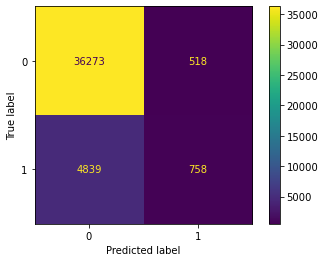

CROSS VALIDATION

Menghasilakan akurasi sebesar 0.87 dengan standar deviasi sebesar 0.00


In [157]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

pred = log_reg.predict(X_val)

# Nilai metrics
print("NILAI METRICS\n")
print(f"Nilai Precision: {precision_score(y_val, pred)}")
print(f"Nilai Recall: {recall_score(y_val, pred)}")
print(f"Nilai accuracy: {accuracy_score(y_val, pred)}")
print(f"Nilai F1 Score: {f1_score(y_val, pred)}")

# Confusion matrix
print("\nCONFUSION MATRIX\n")
con_matrix = confusion_matrix(y_val, pred)
ConfusionMatrixDisplay(confusion_matrix=con_matrix).plot()
plt.show()

# Cross validation
print("CROSS VALIDATION\n")
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print("Menghasilakan akurasi sebesar %0.2f dengan standar deviasi sebesar %0.2f" % (scores.mean(), scores.std()))


## No 2
### Analisis Data

In [158]:
data.corr()

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
hour,1.000000,-0.525264,-0.517920,-0.525277,-0.038128,0.509068,-0.200925,-0.045260,0.083878
temp,-0.525264,1.000000,0.990006,0.990866,-0.330157,-0.704173,0.146250,0.099441,-0.209792
temp_min,-0.517920,0.990006,1.000000,0.964316,-0.322168,-0.695061,0.142454,0.099499,-0.207823
temp_max,-0.525277,0.990866,0.964316,1.000000,-0.330576,-0.701721,0.147038,0.096501,-0.207877
pressure,-0.038128,-0.330157,-0.322168,-0.330576,1.000000,0.005284,-0.010681,-0.315603,-0.092652
humidity,0.509068,-0.704173,-0.695061,-0.701721,0.005284,1.000000,-0.291652,0.031189,0.296700
wind_speed,-0.200925,0.146250,0.142454,0.147038,-0.010681,-0.291652,1.000000,0.090482,0.037894
wind_deg,-0.045260,0.099441,0.099499,0.096501,-0.315603,0.031189,0.090482,1.000000,0.154758
raining,0.083878,-0.209792,-0.207823,-0.207877,-0.092652,0.296700,0.037894,0.154758,1.000000


In [159]:
df_train.corr()

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
hour,1.000000,-0.524625,-0.517485,-0.524620,-0.036858,0.508015,-0.198036,-0.043853,0.086452
temp,-0.524625,1.000000,0.989977,0.990848,-0.332957,-0.704613,0.144643,0.098109,-0.209260
temp_min,-0.517485,0.989977,1.000000,0.964214,-0.324708,-0.695719,0.141148,0.098183,-0.207204
temp_max,-0.524620,0.990848,0.964214,1.000000,-0.333471,-0.702143,0.145384,0.095026,-0.207583
pressure,-0.036858,-0.332957,-0.324708,-0.333471,1.000000,0.008142,-0.012827,-0.316609,-0.094623
humidity,0.508015,-0.704613,-0.695719,-0.702143,0.008142,1.000000,-0.288714,0.032181,0.297165
wind_speed,-0.198036,0.144643,0.141148,0.145384,-0.012827,-0.288714,1.000000,0.090571,0.040938
wind_deg,-0.043853,0.098109,0.098183,0.095026,-0.316609,0.032181,0.090571,1.000000,0.155436
raining,0.086452,-0.209260,-0.207204,-0.207583,-0.094623,0.297165,0.040938,0.155436,1.000000


#### Duplicate Value

In [160]:
print(data[data.duplicated()])
print(f"\nJumlah data duplicated: {data.duplicated().sum()}")
percentage = (data.duplicated().sum() / len(data)) * 100
print("Persentase data yang duplicate adalah sebesar {:.2f} %".format(percentage))

        hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
8773       0  26.68     26.68     26.68    1009.0        84        3.07   
8940      23  26.60     26.60     26.60    1009.0        88        6.20   
8941       0  26.60     26.60     26.60    1009.0        88        6.20   
8942       1  26.60     26.60     26.60    1009.0        88        6.20   
17543      0  26.28     26.28     26.28    1011.0        85        0.49   
...      ...    ...       ...       ...       ...       ...         ...   
264664     9  30.07     30.00     30.20    1007.0        79        3.10   
264744    12  27.90     27.70     28.00    1010.0        83        1.00   
264756     0  28.00     28.00     28.00    1011.0        83        1.00   
264784     4  31.00     31.00     31.00    1011.0        70        4.10   
264881     5  30.00     30.00     30.00    1008.0        74        5.10   

        wind_deg  raining  
8773         287     True  
8940         300    False  
8941         30

In [161]:
print(df_train[df_train.duplicated()])
print(f"\nJumlah df_train duplicated: {df_train.duplicated().sum()}")
percentage = (df_train.duplicated().sum() / len(df_train)) * 100
print("Persentase df_train yang duplicate adalah sebesar {:.2f} %".format(percentage))


        hour  temp  temp_min  temp_max  pressure  humidity  wind_speed  \
93272     13  25.0      25.0      25.0    1010.8        73        3.10   
59112      4  30.0      30.0      30.0    1011.9        62        4.10   
77316      5  31.0      31.0      31.0    1008.1        66        3.60   
118807    10  26.0      26.0      26.0    1010.8        83        3.60   
74896     10  28.0      28.0      28.0    1009.1        78        3.60   
...      ...   ...       ...       ...       ...       ...         ...   
116999     2  31.0      31.0      31.0    1010.2        74        3.10   
124060    13  28.0      28.0      28.0    1010.2        83        4.60   
86791     23  26.0      26.0      26.0    1010.8        88        1.83   
182507     5  30.0      30.0      30.0    1009.1        70        4.60   
119686     1  28.0      28.0      28.0    1012.9        74        3.10   

        wind_deg  raining  
93272        120    False  
59112        110    False  
77316        130    False  

In [162]:
print(df_val[df_val.duplicated()])
print(f"\nJumlah df_val duplicated: {df_train.duplicated().sum()}")
percentage = (df_val.duplicated().sum() / len(df_val)) * 100
print("Persentase df_val yang duplicate adalah sebesar {:.2f} %".format(percentage))


        hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
110333     4  29.00      29.0      29.0    1012.9        70        5.10   
107912     7  30.00      30.0      30.0    1008.1        79        2.60   
199419    19  25.04      25.0      25.1    1012.0        79        6.69   
57721      5  30.00      30.0      30.0    1011.9        66        4.10   
31674      4  29.00      29.0      29.0    1011.9        70        4.60   
...      ...    ...       ...       ...       ...       ...         ...   
109530    17  26.00      26.0      26.0    1010.2        83        2.60   
55301     10  29.00      29.0      29.0    1009.1        79        2.60   
64271     11  28.00      28.0      28.0    1010.2        83        2.60   
93765      2  29.00      29.0      29.0    1012.9        66        4.10   
127932     8  29.00      29.0      29.0    1008.1        74        4.10   

        wind_deg  raining  
110333       110    False  
107912       110    False  
199419       12

Terlihat pada hasil yang tampil di atas, terdapat data yang duplicate sebanyak 7253 data. Persentase data yang duplicate dari keseluruhan data adalah sebesar 2.74 %. Hal ini relatif cukup kecil.

#### Missing Value

Hanya memeriksa pada data set keseluruhan saja.

In [163]:
data.isna().sum()

hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
raining       0
dtype: int64

Terlihat pada hasil yang ditampilkan di atas, tidak terdapat kolom yang mengalami missing value. Oleh karena itu, penanganan missing value tidak diperlukan.

#### Outlier

In [164]:
#Keseluruhan
numeric_cols = data.select_dtypes(include="number").columns
for column in numeric_cols:
    # Menghitung IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung lower dan upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Menampilkan outlier
    print("Outliers in", column)
    print(outliers[column].values)
    print("Number of outliers:", len(outliers))
    print("\n")


Outliers in hour
[]
Number of outliers: 0


Outliers in temp
[20.9  20.9  20.9  ... 33.7  32.66 34.  ]
Number of outliers: 1458


Outliers in temp_min
[32.4 32.4 32.4 ... 33.2 33.2 34. ]
Number of outliers: 1716


Outliers in temp_max
[20.9 20.9 20.9 21.2 21.2 21.2 20.5 20.5 20.5 33.6 33.6 33.6 33.8 33.8
 33.8  3.   3.  34.1 34.1 34.1 33.8 33.8 34.2 34.2 34.2 21.  21.  21.
 21.4 21.4 21.4 21.  21.  21.  21.  21.  20.  21.  20.  21.  21.  21.
 20.  21.  21.  21.  21.  21.  20.2 19.  19.  21.  21.  21.  21.  21.
 21.2 20.  20.2 19.  19.  21.  21.  21.  21.4 21.  20.  20.  21.  20.
 20.  20.2 20.  21.  21.  20.9 21.  20.  21.  21.  20.  21.  21.  21.
 34.  34.  20.7 21.  21.2 21.2 20.  20.  20.  20.  20.  19.  19.  21.
 21.  21.  21.  21.  20.8 20.  21.  21.  20.8 20.8 21.  21.1 21.1 21.
 21.  20.  21.  20.  34.2 21.  21.  20.  21.4 21.  20.  21.  21.  20.
 21.  21.  21.2 21.2 21.2 21.2 21.  21.  21.2 21.2 21.  21.  21.  21.
 21.  21.  20.8 19.  19.  21.  20.4 19.  21.  20.8 20.  21.  21.

In [186]:
# Pada data train
numeric_cols = df_train.select_dtypes(include="number").columns
for column in numeric_cols:
    # Menghitung IQR
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung lower dan upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
    
    # Menampilkan outlier
    print("Outliers in", column)
    print(outliers[column].values)
    print("Number of outliers:", len(outliers))
    print("\n")


Outliers in hour
[]
Number of outliers: 0


Outliers in temp
[]
Number of outliers: 0


Outliers in temp_min
[31.6  31.6  22.22 31.6  31.7  31.6  31.6  22.22 31.7  31.7  31.6  31.7
 31.6  31.6  22.22 31.6  31.6  31.6  31.6  31.6  31.6  31.6  22.22 31.6
 31.6  31.6  22.22 31.6  31.6  31.6  31.6  31.6  31.6  31.6  31.6  31.6
 31.6  22.22 31.6  31.7  31.7  31.6  22.3  22.3  31.6  31.7  31.6  31.6
 31.6  22.3  31.7  31.7  31.6  31.6  31.6  31.7  22.3  31.6  31.7  31.7
 31.6  31.6  31.6  22.22 31.6  31.7  22.22 31.6  31.6  31.7  31.6  22.22
 31.6  31.6  31.7  31.6  31.6  22.22 31.6  31.6  22.3  31.6  31.7  31.6
 22.3  31.7  31.6  22.22 31.6  31.7  22.22 31.6  31.6  31.6  22.22 22.22
 22.3  31.7  31.6  22.3  31.6  31.7  22.22 31.6  31.6  31.6  31.6  31.7
 31.6  31.6  31.6  22.3  31.6  31.6  22.3  22.22 31.6  31.6  31.6  31.6
 31.6  31.6  31.6  31.6  31.7  31.6  31.6  31.6  22.22 22.22 31.6  22.22
 31.7  31.6  31.6  31.6  22.22 22.22 31.7  31.6  31.6  31.6  31.6  31.6
 22.22 31.6  31.7  22.22

Terlihat pada hasil yang ditampilkan di atas, jumlah outlier dari masing-masing feature dari dataset keseluruhan adalah sebagai berikut:
1. hour = 0
2. temp = 1458
3. temp_min = 1716
4. temp_max = 547
5. pressure = 1067
6. humidity = 231
7. wind_speed = 3439
8. wind_deg = 0

Terlihat pada hasil yang ditampilkan di atas, jumlah outlier dari masing-masing feature dari data train adalah sebagai berikut:
1. hour = 0
2. temp = 838
3. temp_min =1061
4. temp_max =322
5. pressure =682
6. humidity = 150
7. wind_speed = 2219
8. wind_deg = 0

Kami tidak memeriksa untuk outliers pada df_val karena kami berasumsi tidak akan digunakan pada optimasi berikutnya dalam kasus outliers.

Index(['hour', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'raining'],
      dtype='object')


<AxesSubplot:xlabel='hour'>

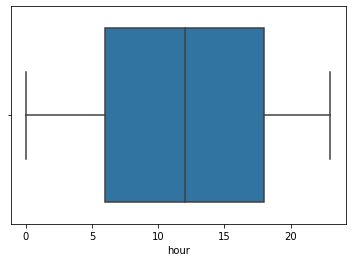

In [166]:
#Outliers plot
print(df_train.columns)
feats =['hour', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'raining']
sns.boxplot(x=df_train['hour'])

<AxesSubplot:xlabel='temp'>

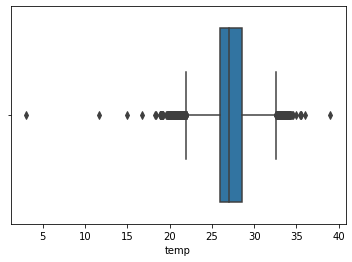

In [167]:
sns.boxplot(x=df_train['temp'])

<AxesSubplot:xlabel='temp_min'>

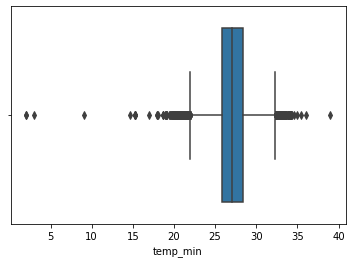

In [168]:
sns.boxplot(x=df_train['temp_min'])

<AxesSubplot:xlabel='temp_max'>

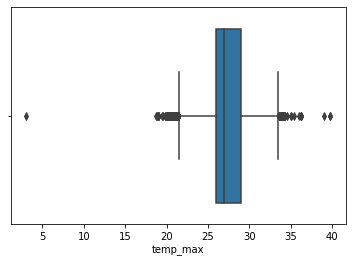

In [169]:
sns.boxplot(x=df_train['temp_max'])

<AxesSubplot:xlabel='pressure'>

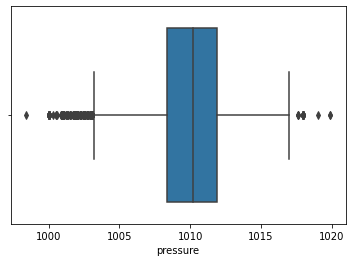

In [170]:
sns.boxplot(x=df_train['pressure'])

<AxesSubplot:xlabel='humidity'>

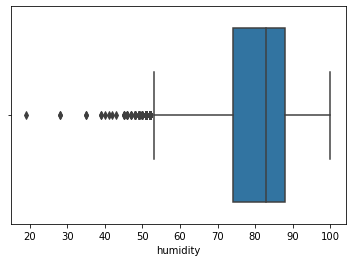

In [171]:
sns.boxplot(x=df_train['humidity'])

<AxesSubplot:xlabel='wind_speed'>

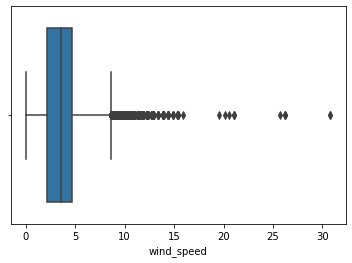

In [172]:
sns.boxplot(x=df_train['wind_speed'])

<AxesSubplot:xlabel='wind_deg'>

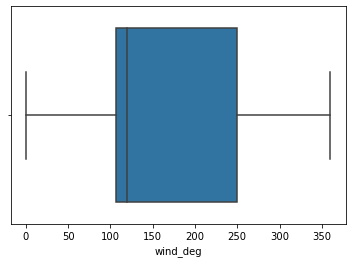

In [173]:
sns.boxplot(x=df_train['wind_deg'])

Kami juga hanya memeriksa outliers untuk data train dengan alasan yang akan dihandling adalah outliers pada data train

### Balance of Data

False    230023
True      34901
Name: raining, dtype: int64


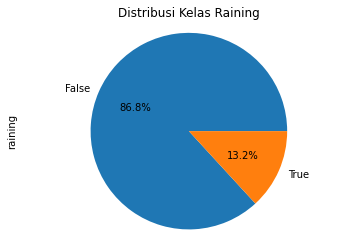

In [174]:
# Periksa kolom label

label_counts = data["raining"].value_counts()
print(label_counts)
label_counts.plot(kind="pie", autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribusi Kelas Raining" )
plt.show()

False    147238
True      22313
Name: raining, dtype: int64


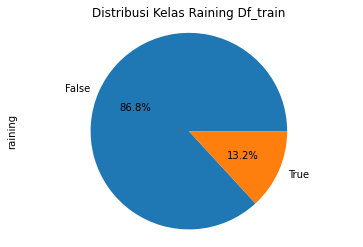

In [175]:
# Periksa kolom label

label_counts = df_train["raining"].value_counts()
print(label_counts)
label_counts.plot(kind="pie", autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribusi Kelas Raining Df_train" )
plt.show()

Pada pie chart di atas, terlihat bahwa 13,2% row kelas target bernilai True. Di sisi lain, 86,8% row kelas target bernilai False. Hal ini menunjukkan bahwa terdapat ketidakseimbangan data yang cukup signifikan sehingga dapat disimpulkan terjadi imbalance pada dataset.

### No 3

- Duplicate value

Berdasarkan data, diketahui terdapat  duplikasi data sebanyak 7253 atau sebesar 2.74 %. Menurut kami solusi untuk mengatasi masalah ini adalah dengan melakukan drop data yang terduplikasi.

- Missing Value

Tidak ada missing value. 

- Outliers 

Beberapa metode yang kami ketahui untuk menangani outliers : 
Penghapusan outlier: Data outlier dapat dihapus dari dataset untuk mengurangi efeknya pada analisis. Namun, teknik ini dapat mengurangi jumlah data yang tersedia dan mengurangi akurasi model.

Transformasi data: Data outlier dapat ditransformasi ke nilai yang lebih sesuai dengan data lain dalam dataset. Contohnya, dengan menggunakan transformasi logaritmik atau inverse.

Imputasi data: Data outlier dapat diimputasi dengan menggunakan metode seperti mean atau median. Namun, teknik ini dapat mempengaruhi distribusi data dan mengurangi akurasi model.

Penggunaan model tahan outlier: Model tahan outlier seperti robust regression dapat digunakan untuk meminimalkan efek outlier pada analisis.

Berdasarkan data diatas, terdapat beberapa fitur yang mempunyai outliers. Korelasi antar fitur juga tidak terlalu signfikan yakni relatif pada rentang 0.2 sampai 0.3 atau justru dibawah rentang tersebut (hanya beberapa hubungan). Oleh karena itu, kami memutuskan untuk menghapus data yang termasuk outlier tersebut. 

- Balance of Data

Pada kasus ini terjadi ketidakseimbangan dataset (imbalance dataset) pada kolom target ini tidak terpenuhi, maka dapat mempengaruhi akurasi model yang dihasilkan. Oleh karena itu, untuk menangani ketidakseimbangan data pada kolom target, beberapa rencana penanganan yang dapat dilakukan adalah sebagai berikut:
1. Oversampling
2. Undersampling

### No 4
Teknik _encoding_ yang digunakan terhadap data yang disediakan

In [176]:
data.dtypes

hour            int64
temp          float64
temp_min      float64
temp_max      float64
pressure      float64
humidity        int64
wind_speed    float64
wind_deg        int64
raining          bool
dtype: object

Pada hasil di atas, feature-feature yang ada memiliki berbagai macam tipe data. Namun, menurut kami, pada dataset ini encoding hanya diperlukan pada kelas target "Raining". Kelas target "Raining" yang berjenis binary akan diencoding menjadi tipe data numerik diskrit dengan value 0 untuk False dan 1 untuk True.

### No 5
Desain Eksperimen

## Tujuan Eksperimen
Memprediksi terjadinya hujan berdasarkan faktor-faktor seperti temperatur, kelembapan, dan kecepatan angin di Denpasar, Bali.

## Variabel Dependen dan Independen
- Dependen: Raining
- Independen: temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg

## Strategi Eksperimen
1. Melakukan penanganan terhadap duplicate value, outlier, balance of data, dan encoding
2. Menentukan metrics eksperimen
3. Membuat model Logistic Regression sebagai baseline dan melakukan prediksi dari model tersebut
4. Melakukan evaluasi model baseline dan menampilkan confusion matrix
5. Melakukan pembelajaran dengan model lain, yaitu Support Vector Machine (SVM)
6. Melakukan hyperparameter tuning model dengan menggunakan Grid Search
7. Melakukan evaluasi hasil hyperparameter tuning model
8. Melakukan oversampling pada kelas minoritas dan undersampling pada kelas mayoritas untuk penanganan
9. Melakukan pembelajaran dengan model baseline menggunakan data pada nomor 8
10. Melakukan evaluasi hasil pembelajaran pada nomor 9
11. Menggabungkan beberapa model dengan menggunakan teknik Soft Voting, Hard Voting, dan Stacking
12. Melakukan evaluasi dari hasil strategi nomor 11

## Skema Validasi
Skema validasi yang digunakan adalah skema 10-fold Cross Validation dari dataset yang ada.

Bagian 2

### Penanganan Missing Value 
Tidak ada nilai missing value

### Penanganan Duplicate Value
Melakukan drop data yang mengalami duplicate value

Kami menghapus df_train karena akan digunakan dalam proses selanjutnya, sedangkan df_val dan df_test dengan tujuan untuk mempercepat proses pembelajaran

In [182]:
df_train= df_train.drop_duplicates()
df_val=df_val.drop_duplicates()
df_test=df_test.drop_duplicates()


In [183]:
print(df_train[df_train.duplicated()])
print(f"\nJumlah df_train duplicated: {df_train.duplicated().sum()}")
percentage = (df_train.duplicated().sum() / len(df_train)) * 100
print("Persentase df_train yang duplicate adalah sebesar {:.2f} %".format(percentage))

Empty DataFrame
Columns: [hour, temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg, raining]
Index: []

Jumlah df_train duplicated: 0
Persentase df_train yang duplicate adalah sebesar 0.00 %


### Penanganan Outlier

In [187]:
numeric_cols = df_train.select_dtypes(include="number").columns
for column in numeric_cols:
    # Menghitung IQR
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung lower dan upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
    df_train.drop(index=list(outliers.index.values), inplace=True)



Memeriksa Data Outliers yang telah di handling

In [189]:
numeric_cols = df_train.select_dtypes(include="number").columns
for column in numeric_cols:
    tmp=0
    # Menghitung IQR
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung lower dan upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
    df_train.drop(index=list(outliers.index.values), inplace=True)
    print(outliers)



Empty DataFrame
Columns: [hour, temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg, raining]
Index: []
Empty DataFrame
Columns: [hour, temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg, raining]
Index: []
        hour   temp  temp_min  temp_max  pressure  humidity  wind_speed  \
118869     0  22.40      22.4      22.4    1013.9        69        6.82   
229562     7  31.70      31.5      32.0    1009.0        62        3.10   
236797     6  31.84      31.5      32.0    1006.6        66        4.10   
24898     23  22.40      22.4      22.4    1010.7        82        0.70   
59836      6  31.50      31.5      31.5    1009.1        67        3.60   
...      ...    ...       ...       ...       ...       ...         ...   
233200     5  31.82      31.5      32.0    1012.0        62        4.10   
9165       5  31.50      31.5      31.5    1009.0        64        7.20   
137278     0  22.70      22.4      23.0    1011.9        83        4.56   
147666    20

Encoding untuk target function

Kami melakukan encode untuk ketiganya untuk meningkatkan performa dalam pembelajaran.

In [192]:
# inisialisasi label encoder
le = LabelEncoder()

# encoding kolom kategorikal
df_train["raining"] = le.fit_transform(df_train["raining"].astype(str))
# encoding kolom kategorikal
df_test["raining"] = le.fit_transform(df_test["raining"].astype(str))
# encoding kolom kategorikal
df_val["raining"] = le.fit_transform(df_val["raining"].astype(str))

df_train.head()
df_test.head()
df_val.head()

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
77457,2,32.00,32.00,32.00,1010.2,74,3.10,100,0
227083,2,27.94,27.90,28.00,1013.0,78,6.20,110,0
165854,11,27.42,27.00,27.70,1010.2,88,2.60,120,0
71017,7,29.00,29.00,29.00,1010.8,79,3.60,100,0
126064,12,27.58,27.58,27.58,1007.0,84,7.45,108,0
